# Training Data Set: Data Import, Cleaning, & EDA

This notebook will deal solely with our training data set, train.csv. In the following sections, I'll clean the data, and conduct some light EDA. This should serve two purposes: to establish a preliminary understanding of the data, and to inform  future feature engineering efforts later on in the model prep phase of this project.

### Importing Packages and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as m
import datetime as dt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

%matplotlib inline


df = pd.read_csv('./datasets/train.csv')
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


# Examining Null Values

The data set has a substantial amount of null values. At this early stage in the cleaning process, I chose to address these by replacing nulls in categorical columns with the string ’NA’, and nulls in numeric columns with 0.0.

In [2]:
df.isnull().sum().sort_values(ascending=False)[:27]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
Overall Cond         0
dtype: int64

In [3]:
# Replacing nulls with 'NA' for all categorical data:

na_columns = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Garage Finish', 'Garage Cond', 
              'Garage Qual', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 2', 'Bsmt Cond', 
              'Bsmt Qual', 'Mas Vnr Type'] 

[df[x].replace(np.nan, 'NA', inplace=True) for x in na_columns]

df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [4]:
# Converting nulls to 0.0 for numeric data:

zero_columns = ['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Half Bath', 'Bsmt Full Bath', 
                'Garage Cars', 'Garage Area', 'Bsmt Unf SF', 'BsmtFin SF 2', 'Total Bsmt SF', 'BsmtFin SF 1']

[df[x].replace(np.nan, '0.0', inplace=True) for x in zero_columns]

df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [5]:
# Converting all "None" values to 'NA':

df.replace('None', 'NA', inplace=True)
df['Mas Vnr Type'].unique()

array(['BrkFace', 'NA', 'Stone', 'BrkCmn'], dtype=object)

# Cleaning

The data set contains a variety of data types - nominal, ordinal, discrete, and continuous variables. Not only is there a large number of variables within the data set, in some cases there are also multiple columns describing a single real estate element. One can find up to 7 columns related to Garage properties, for example. I suspected this would lead to a certain amount of multicollinearity between variables, so I took measures to transform the data to prevent this from negatively influencing my model.

Before taking any action, I looked at the strongest correlations between Sale Price and other variables (0.5 or stronger). I used the heat map in _**figure 1**_  as a reference, so as not to drop or alter any columns that might have a strong relationship with the target variable.

- **Cleaning up Dtypes:** 'Lot Frontage', 'Mas Vnr Area', 'Garage Area', 'Garage Cars' were reading as ‘object’ values, despite being clearly numeric. I converted these to floats. 
- **Bathrooms:** I took the sum of all bathroom columns, put that total in a variable called ’Total Baths,’ and dropped the original bath columns.
- **Garage:** I transformed the categorical ‘Garage Finish’ column into ‘Has Finished Garage’ and ‘Has Detached Garage’ using one-hot encoding to indicate finished vs unfinished garages. All remaining garage columns were dropped.
- **Basement:** There were multiple categorical columns describing type of basement finish, so I converted these into a one-hot encoded ‘Has Finished Basement’ column and dropped the originals.
- **Square Feet:** All columns describing square footage were added together into a single ‘Total sq ft’ column. I chose to keep the originals in the data set.
- **Year Built:** I chose to convert this year column into ‘Age,’ as a way of addressing the nebulous relationship between year as a point in time, and year as a number.


- **Additional One-Hot Encoded Transformations:**
    - ‘Year Remod/Add’ changed to  ‘Is Remodeled’
    - ‘Pool QC’ changed to ‘Has Pool’
    - ‘Fence’ changed to ‘Has Fence’
    - ‘Paved Drive’ changed to ‘Has Paved Drive’
    - ‘Central Air’ changed to ‘Has Central Air’
    
    
- **A number of categorical variables were transformed into dummy columns:**
    - 'Lot Config'
    - 'MS Zoning'
    - 'Misc Feature'
    - 'Heating QC'
    - 'House Style'
    - 'Bldg Type'
    
    
- **Variables that contained quality rankings were transformed into ordinal values,** on a scale of 0 to 5, with 0 denoting ‘NA,’ and 5 denoting excellent condition:
    - 'Bsmt Qual'
    - ‘Fireplace Qu'
    - 'Garage Qual'
    - 'Garage Cond'
    - 'Exter Qual'
    - 'Exter Cond'
    - 'Kitchen Qual'
    - 'Exter Qual'
    - 'Exter Cond'


### Figure 1

Text(0.5, 1.0, 'Correlation Matrix: Ames Housing Data Set Variables ')

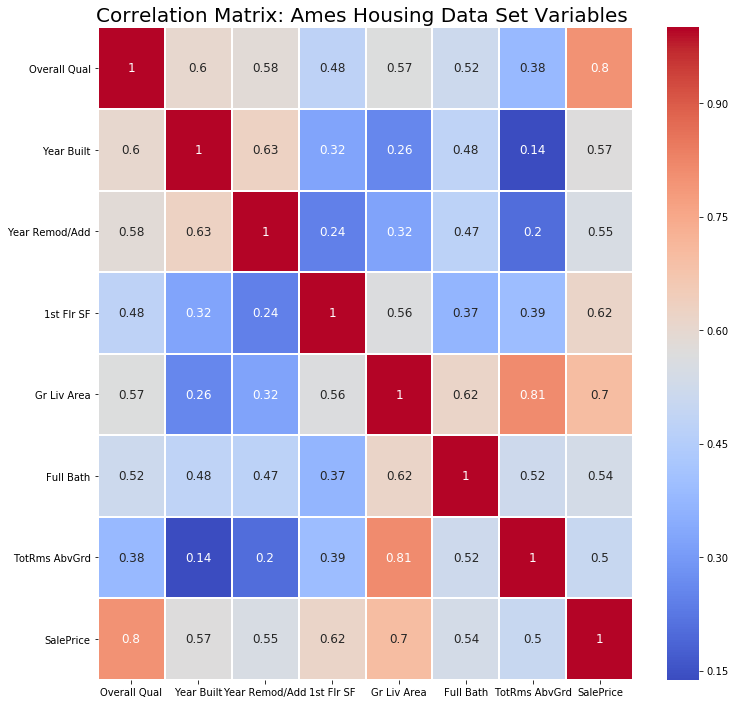

In [6]:
correlations = df.corr()['SalePrice'][df.corr()['SalePrice'] >= .5]
corr_list = [x for x in correlations.index]

fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(df[corr_list].corr(), annot=True, linewidths=1, cmap="coolwarm", annot_kws={"size": 12})
ax.set_title('Correlation Matrix: Ames Housing Data Set Variables ', fontsize=20)

In [7]:
# Lot frontage, Mas Vnr Area, Garage Cars, and Garage Area should be columns of numeric values. 
# I'll change these columns to floats:

floatify = ['Lot Frontage', 'Mas Vnr Area', 'Garage Area', 'Garage Cars']

for x in floatify:
    df[x] = df[x].astype('float64', copy=False)

In [8]:
# Consolidating bathrooms

baths = [x for x in df.columns if 'Bath' in x]

df['Total Baths'] = df[baths].sum(axis=1)
df.drop(['Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath'], axis=1, inplace=True)

In [9]:
# Creating 'Has Finished Garage' column for Finished or Rough Finished garages, and 'Has Detached Garage' column

searchfor = 'Fin', 'RFn'
df['Has Finished Garage'] = np.where(df['Garage Finish'].str.contains('|'.join(searchfor)), 1, 0)

df['Detached Garage'] = np.where(df['Garage Type'].str.contains('Detchd'), 1, 0)

df.drop(['Garage Finish', 'Garage Yr Blt', 'Garage Type',], axis=1, inplace=True)

In [10]:
# Consolidating basement columns into 'Has Finished Basement'

lookfor = 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ'

df['Has Finished Basement'] = np.where(df['BsmtFin Type 2'].str.contains('|'.join(lookfor)), 1, 0)
df['Has Finished Basement'] = np.where(df['BsmtFin Type 1'].str.contains('|'.join(lookfor)), 1, 0)


df.drop(['BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Cond', 'Bsmt Exposure'], axis=1, inplace=True)

In [11]:
# Creating a new column of total square feet

sq_ft = [x for x in df.columns if 'SF' in x]

df['Total sq ft'] = df[sq_ft].sum(axis=1)

In [12]:
# Converting 'Year Remod/Add' to numerical 'Is Remodeled'

df['Is Remodeled'] = np.where(df['Year Remod/Add'] - df['Year Built'] > 0, 1, 0)
df.drop(['Year Remod/Add'], axis=1, inplace=True)

In [13]:
# Pool

df['Has Pool'] = np.where(df['Pool QC'].str.contains('NA'), 0, 1)
df.drop(['Pool QC'], axis=1, inplace=True)

In [14]:
# Fence

df['Has Fence'] = np.where(df['Fence'].str.contains('NA'), 0, 1)
df.drop(['Fence'], axis=1, inplace=True)

In [15]:
# Paved Drive

df['Has Paved Drive'] = np.where(df['Paved Drive'].str.contains('N'), 0, 1)
df.drop(['Paved Drive'], axis=1, inplace=True)

In [16]:
# Central Air

df['Has Central Air'] = np.where(df['Central Air'].str.contains('N'), 0, 1)
df.drop(['Central Air'], axis=1, inplace=True)

In [17]:
# Created dummy columns

df = pd.get_dummies(df, columns = ['Lot Config', 'MS Zoning', 'Misc Feature', 'Heating QC', 
                                   'House Style', 'Bldg Type'], drop_first=True)

In [18]:
# Quality rankings - transforming categorical vairables to ordinal ones

cols = ['Bsmt Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Exter Qual', 
        'Exter Cond', 'Kitchen Qual', 'Exter Qual', 'Exter Cond']

rankings = {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

for x in cols:
    df[x] = df[x].map(lambda x: rankings.get(x, x))

In [19]:
# Turning the 'Year Built' column into 'Age'

now = dt.datetime.now()
df['Current Year'] = now.year
df['Age'] = df['Current Year'] - df['Year Built']
df.drop(['Current Year', 'Year Built', 'Mo Sold', 'Yr Sold', 'Misc Feature_TenC'], axis=1, inplace=True)

In [20]:
# Dropping the remaining object columns

df.drop(df.select_dtypes(include=['object']).columns, axis=1, inplace=True)

In [21]:
# Saving the cleaned data to a .csv file 

#df.to_csv('./datasets/train_v2.csv', index=False)

# EDA

Exploring the dataset confirms a few suspicions regarding feature relationships and distributions within the dataset. In looking at the summary statistics of the data, we can see that numerical series values are drastically varied in order of magnitude. This can be addressed during model prep by scaling the training and testing data prior to fitting. This is also a good indication that the best predictive model will be one that can regularize coefficients in order to minimize some of the variance that is occurring here.

By plotting the distribution of Sale Price (_**figure 2**_), we can see that the data is right-skewed. This makes sense, as home prices tend to decrease in number as their value increases. _**Figure 3**_ displays the correlation values of the top 10 predictors of Sale Price.

The top three correlated features are also plotted here in scatterplots (_**figures 4 - 6**_), and all three demonstrate a linear relationship with the target variable.

In [22]:
df.describe().T.head(20)

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2198.0,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,70.0,190.0
Lot Frontage,2051.0,5.794442e+01,3.313733e+01,0.0,43.5,63.0,78.0,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,11513.5,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.0,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.0,9.0
Mas Vnr Area,2051.0,9.862652e+01,1.743247e+02,0.0,0.0,0.0,159.0,1600.0
Exter Qual,2051.0,3.406143e+00,5.879616e-01,2.0,3.0,3.0,4.0,5.0
Exter Cond,2051.0,3.085812e+00,3.727924e-01,1.0,3.0,3.0,3.0,5.0


### Figure 2

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


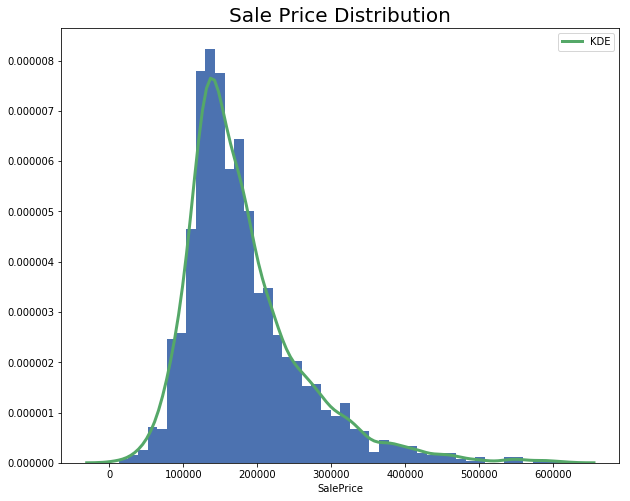

In [24]:
sns.set_color_codes("deep")
plt.figure(figsize=(10, 8))
sns.distplot(df['SalePrice'], kde_kws={"color": "g", "lw": 3, "label": "KDE"},
                              hist_kws={"alpha": 1, "color": "b"})
plt.title("Sale Price Distribution", fontsize=20);

### Figure 3

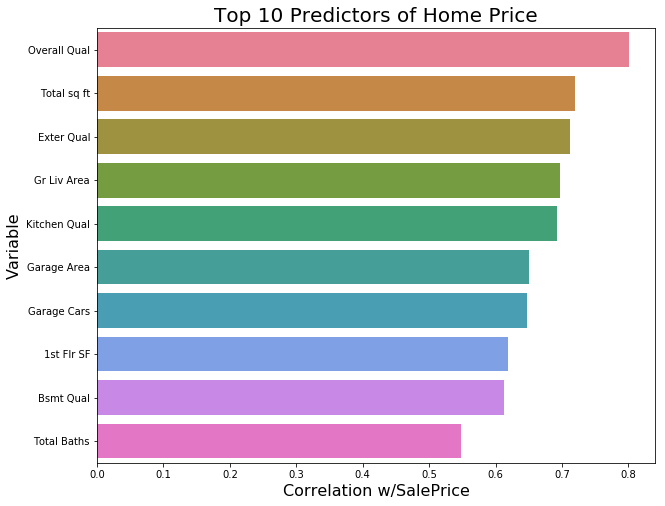

In [25]:
predictors = df.corr()[['SalePrice']].sort_values('SalePrice', ascending=False)
corr_df = pd.DataFrame(predictors.iloc[1:11])

plt.figure(figsize=(10, 8))
sns.barplot( corr_df['SalePrice'], corr_df.index, palette='husl')
plt.title('Top 10 Predictors of Home Price', fontsize=20)
plt.xlabel('Correlation w/SalePrice', fontsize=16)
plt.ylabel('Variable', fontsize=16)
plt.show()

In [26]:
corr_df['SalePrice']

Overall Qual    0.800207
Total sq ft     0.718975
Exter Qual      0.712146
Gr Liv Area     0.697038
Kitchen Qual    0.692336
Garage Area     0.649897
Garage Cars     0.647781
1st Flr SF      0.618486
Bsmt Qual       0.612188
Total Baths     0.547758
Name: SalePrice, dtype: float64

### Figure 4

Text(0.5, 1.0, 'Overall Quality Rating vs Sale Price')

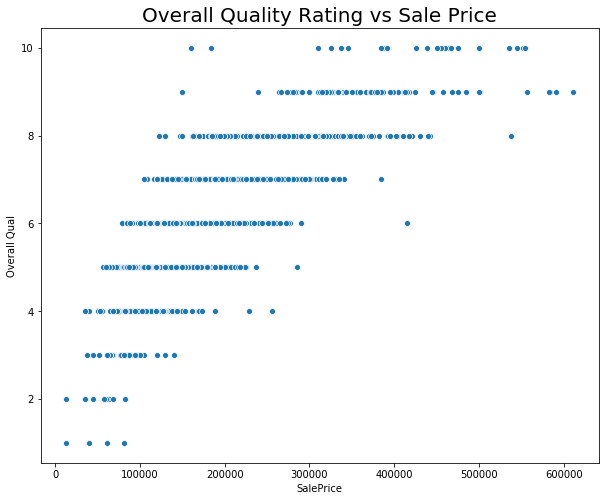

In [27]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='SalePrice', y='Overall Qual', data=df)
plt.title('Overall Quality Rating vs Sale Price', fontsize=20)

### Figure 5

Text(0.5, 1.0, 'Total Square Footage vs Sale Price')

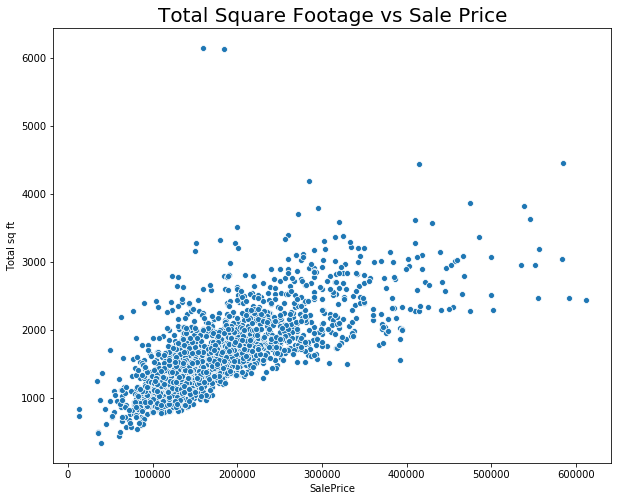

In [28]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='SalePrice', y='Total sq ft', data=df)
plt.title('Total Square Footage vs Sale Price', fontsize=20)

### Figure 6

Text(0.5, 1.0, 'Exterior Quality Rating vs Sale Price')

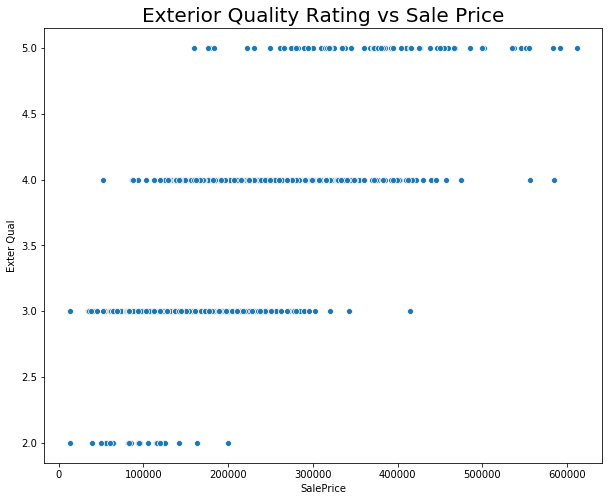

In [29]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='SalePrice', y='Exter Qual', data=df)
plt.title('Exterior Quality Rating vs Sale Price', fontsize=20)